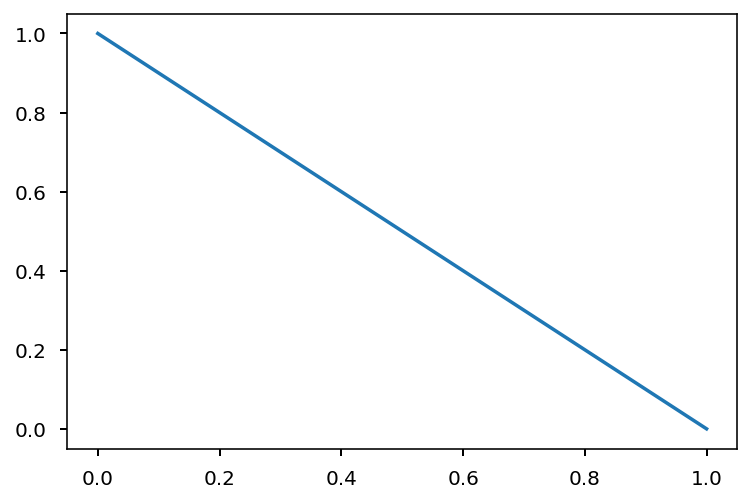

In [1]:
%matplotlib inline
import seaborn as sns
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'
#%inline
#import matplotlib as mpl
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()


In [2]:
from neuronunit.optimisation.optimization_management import TSD
"""Tests of NeuronUnit test classes"""
import unittest
import os
import sys
import dask
from dask import bag
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

from itertools import repeat
import quantities as pq

import copy
import unittest
import pickle

import numpy as np
import pickle
import dask.bag as db
import os

from neuronunit.optimisation import get_neab
from neuronunit.optimisation.data_transport_container import DataTC

from neuronunit.optimisation.optimization_management import dtc_to_rheo#, mint_generic_model
from neuronunit.optimisation.optimization_management import OptMan,inject_and_plot_model

from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
from neuronunit.optimisation import exhaustive_search
from neuronunit.optimisation.model_parameters import MODEL_PARAMS
from neuronunit.tests import dynamics
from neuronunit.optimisation import data_transport_container

from neuronunit.tests.fi import RheobaseTest, RheobaseTestP
from neuronunit import aibs
from neuronunit.optimisation.optimisations import run_ga
from neuronunit.optimisation import model_parameters
from neuronunit.optimisation import mint_tests
from neuronunit.optimisation import get_neab
test_frame = get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
from IPython.display import HTML, display
import matplotlib.pyplot as plt
from neuronunit.optimisation.optimization_management import inject_and_plot

consider installing pynn a heavier backend


INFO:root:test
INFO:root:test


pynn python Error


In [3]:

def jrt(use_test,backend):
    use_test = TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]

    OM = OptMan(use_test,\
                backend=backend,\
                boundary_dict=edges,\
                protocol={'allen': False, 'elephant': True})

    return OM


def permutations(use_test,backend):
    use_test = TSD(use_test)
    use_test.use_rheobase_score = True
    edges = model_parameters.MODEL_PARAMS[backend]
    ga_out0 = use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True}, MU=2,NGEN=1)
    ga_out1 =  use_test.optimize(edges,backend=backend,\
        protocol={'allen': False, 'elephant': True},\
            MU=2,NGEN=1,seed_pop=ga_out0['pf'][0])

    
    dtc = ga_out1['pf'][0].dtc
    vm,plt = inject_and_plot_model(dtc.attrs,dtc.backend)

    return dtc, ga_out1['DO'], vm


In [4]:
test_frame = get_neab.process_all_cells()
test_frame.pop('Olfactory bulb (main) mitral cell',None)
OMObjects = []
backends = ["RAW","HH"]#,"ADEXP","BHH"]
t = test_frame['Neocortex pyramidal cell layer 5-6']
#for t in test_frame.values():
#    break
    
for b in backends:        
    OM = jrt(copy.copy(t),b)
    OMObjects.append(OM)
        #print(dir(OM))
rt_outs = []


In [5]:
OM.tests
print(len(OMObjects))

2


In [6]:
for OM in OMObjects:
   print(OM.backend)
   x= {k:v for k,v in OM.tests.items() if 'mean' in v.observation.keys() or 'value' in v.observation.keys()}
   OM.tests = TSD(OM.tests)
   rt_out = OM.round_trip_test(OM.tests,OM.backend,OM.boundary_dict,NGEN = 8, MU = 8)
   rt_outs.append(rt_out)  


RAW
HH


In [7]:
rt_outs
def plot_binary_match(rt_outs,index):
    from neuronunit.optimisation.optimization_management import inject_and_plot_model
    dtc= rt_outs[index][0]['pf'][0].dtc
    vm,dtc = inject_and_plot_model(dtc.attrs,dtc.backend)
    dtc1 = rt_outs[index][2][0]
    vm,dtc1 = inject_and_plot_model(dtc1.attrs,dtc1.backend)
#plt.plot(dtc1.vm.magnitude,dtc1.vm.times)
#plt.plot(dtc.vm.magnitude,dtc.vm.times)
#plt.show()

'RAW'

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
,Z = -0.53,Z = 0.37,Z = -0.47,Z = -0.61,Z = -219203617794542.66,Z = 0.27,Z = -1.38


'HH'

,RheobaseTest,InputResistanceTest,TimeConstantTest,CapacitanceTest,RestingPotentialTest,InjectedCurrentAPAmplitudeTest,InjectedCurrentAPThresholdTest
,Z = 0.62,Z = 0.35,Z = -0.11,Z = -0.34,Z = -137.24,Z = -0.35,Z = -0.03


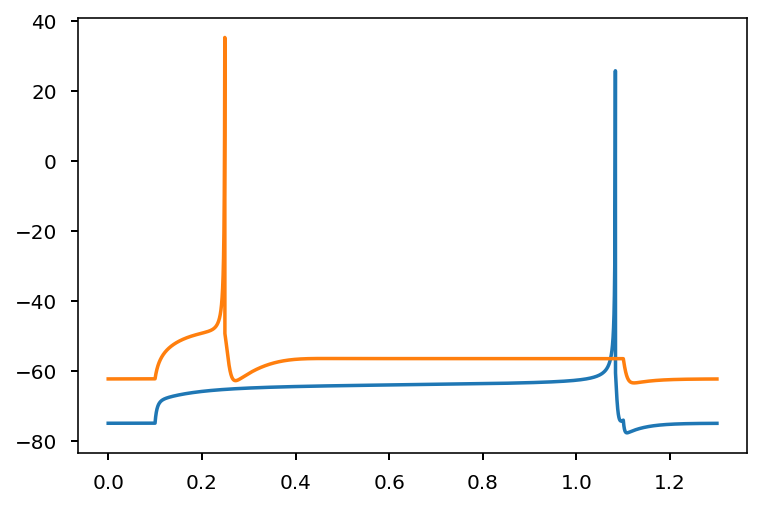

In [12]:
plt.clf()
plot_binary_match(rt_outs,0)

#plot_binary_match(rt_outs,2)
#plot_binary_match(rt_outs,3)

display(rt_outs[0][0]['pf'][0].dtc.backend)
display(rt_outs[0][0]['pf'][0].dtc.SM)
display(rt_outs[1][0]['pf'][0].dtc.backend)
display(rt_outs[1][0]['pf'][0].dtc.SM)
try:
    display(rt_outs[2][0]['pf'][0].dtc.backend)
    display(rt_outs[2][0]['pf'][0].dtc.SM)
except:
    pass
try:
    display(rt_outs[3][0]['pf'][0].dtc.backend)
    display(rt_outs[3][0]['pf'][0].dtc.SM)
except:
    pass

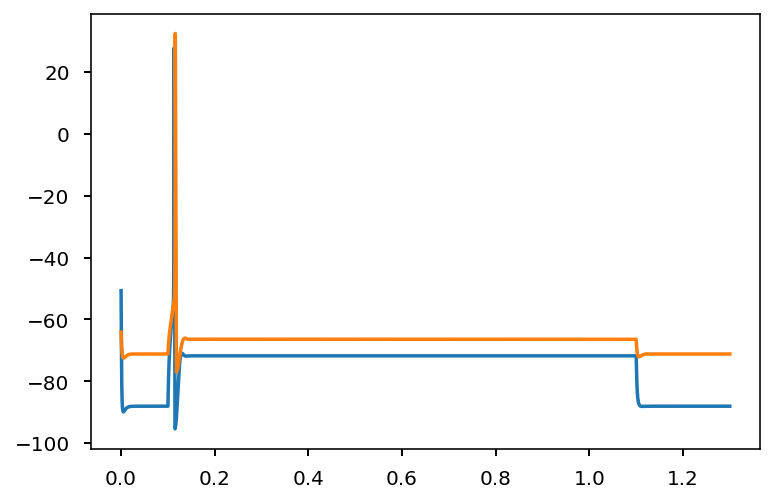

In [11]:
plt.clf()
plot_binary_match(rt_outs,1)

In [ ]:
display(rt_outs[0][0]['pf'][0].dtc.similarity)
display(rt_outs[0][0]['pf'][0].dtc.obs_preds)
display(rt_outs[1][0]['pf'][0].dtc.backend)
display(rt_outs[1][0]['pf'][0].dtc.similarity)

In [ ]:

backends = ["RAW","HH"]#,"ADEXP","BHH"]


for t in test_frame.values():
    for b in backends:
        
        (dtc,DO,vm) = permutations(copy.copy(t),b)
        print(b)
        display(dtc.SM)
        display(dtc.obs_preds)
        plt.plot(vm.times,vm.magnitude)
        plt.show()




In [ ]:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"ADEXP")
display(dtc.SM)
display(dtc.obs_preds)

In [ ]:

backends = ["RAW","HH","BHH"]  



#for b in backends:
(dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],"RAW")


In [ ]:
backends = iter(["RAW","HH","BHH"])


from IPython.display import HTML, display

for b in backends:
    (dtc,DO) = permutations(test_frame['Neocortex pyramidal cell layer 5-6'],b)
    display(dtc.SM)
    display(dtc.obs_preds)



In [ ]:
#test_frame['Neocortex pyramidal cell layer 5-6']